<h1 style='text-align: center;'> Simpy: Practica GRaficas </h1> 

Al modelo de simulación de la venta de boletos de un teatro/cine agregar la simulación grafica 2D/3D utilizando cualquier libreria grafica, por ejemplo pygame/tkinter, etc. generar un informe en formato PDF que me permita evidenciar la simulación y generar una grafica/reporte de los resultados.

In [14]:
import collections
import random
import simpy



VELOCIDAD_LLEGADA = 42
NUM_BOLETO = 50
TIEMPO_SIMULACION = 120

boletos_peliculas={}

def ventaBoletos(env, num_boletos, pelicula, teatro):
  with teatro.contador.request() as turno:
    resultado = yield turno | teatro.sold_out[pelicula]
    if turno not in resultado:
      teatro.num_renegados[pelicula] += 1
      return
    if teatro.num_boletos[pelicula] < num_boletos:
      yield env.timeout(0.5) 
      return
    else:
      if pelicula in list(boletos_peliculas.keys()):
        a=boletos_peliculas.get(pelicula)
        a.append(num_boletos)
        boletos_peliculas[pelicula]=a
      else:
        boletos_peliculas[pelicula]=[num_boletos]

    teatro.num_boletos[pelicula] -= num_boletos
    if teatro.num_boletos[pelicula] < 2:
      teatro.sold_out[pelicula].succeed()
      teatro.tiempo_agotado[pelicula] = env.now
      teatro.num_boletos[pelicula] = 0
    yield env.timeout(1)


def llegadaClientes(env, teatro):
  while True:
    yield env.timeout(random.expovariate(1/0.5))
    pelicula = random.choices(teatro.peliculas, teatro.probabilidad, k=1)
    num_boletos = random.randint(1, 6)
    if teatro.num_boletos[pelicula[0]]:
      env.process(ventaBoletos(env, num_boletos, pelicula[0], teatro))


Teatro = collections.namedtuple('Teatro', 'contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados')

env = simpy.Environment()

contador = simpy.Resource(env,capacity=1)
peliculas = ['Conjuro 3', 'Rapidos y Furiosos 10', 'Pulp Fictions']
probabilidad=[0.1, 0.3, 0.6]
num_boletos = {pelicula: NUM_BOLETO for pelicula in peliculas}
sold_out = {pelicula: env.event() for pelicula in peliculas}
tiempo_agotado = {pelicula: None for pelicula in peliculas}
num_renegados = {pelicula: 0 for pelicula in peliculas}

teatro = Teatro(contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados)
env.process(llegadaClientes(env, teatro))
env.run(until=TIEMPO_SIMULACION)

# Analisis y resultados
for pelicula in peliculas:
    if teatro.sold_out[pelicula]:
        print('Pelicula: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula]))
        print('Numero de personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula])


Pelicula: Conjuro 3 se agoto en el tiempo 54.4 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 0
Pelicula: Rapidos y Furiosos 10 se agoto en el tiempo 35.3 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 7
Pelicula: Pulp Fictions se agoto en el tiempo 29.3 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 25


In [16]:
# Analisis y resultados
for pelicula in peliculas:
    if teatro.sold_out[pelicula]:
        print('Pelicula: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula]))
        print('Numero de personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula])

Pelicula: Conjuro 3 se agoto en el tiempo 54.4 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 0
Pelicula: Rapidos y Furiosos 10 se agoto en el tiempo 35.3 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 7
Pelicula: Pulp Fictions se agoto en el tiempo 29.3 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 25


In [21]:
def generate_histogram(data):
    plt.figure(figsize=(13,7))
    plt.bar(list(data.keys()), data.values(), color='b')
    plt.title("Simulación de la venta de boletos")
    plt.ylabel('Tiempo en el que se agoto (min)')
    plt.xlabel('Películas')
    plt.show()

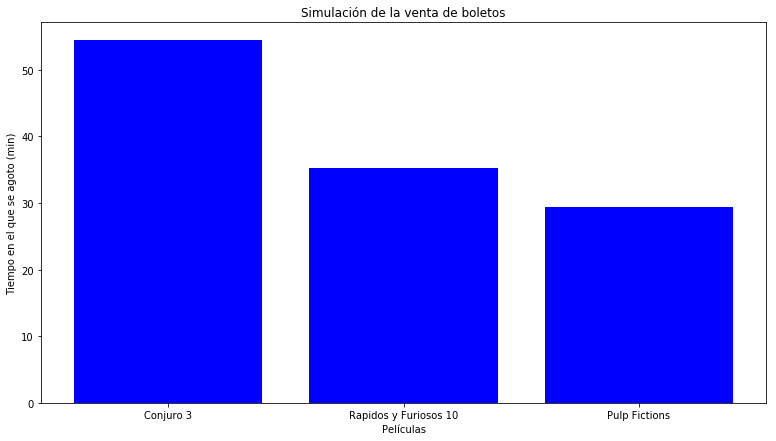

In [22]:
generate_histogram(teatro.tiempo_agotado)

In [23]:
from turtle import color
import simpy
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class ClockAndData: 
    def __init__(self, canvas, peliculas, y1, y2, y3, time): 
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
        self.peliculas = peliculas
        self.canvas = canvas
        self.step_acum=0
        self.step_x1=[0]
        self.step_y1=[0]
        self.step_x2=[0]
        self.step_y2=[0]
        self.step_x3=[0]
        self.step_y3=[0]
        data_plot.draw()
        self.canvas.update() 

    def tick(self, y1, y2, y3, time): 

        a1.cla()

        self.step_x1.append(time)
        self.step_y1.append(y1)

        self.step_x2.append(time)
        self.step_y2.append(y2)

        self.step_x3.append(time)
        self.step_y3.append(y3)

        a1.set_title("compra boletos Conjuro 3")
        a1.set_xlabel("Tiempo")
        a1.set_ylabel("Boletos vendidos")
        a1.step(self.step_x1, self.step_y1, color='blue')

        a1.legend(['Conjuro 3'])

        a2.set_title("compra boletos Rapidos y Furiosos 10")
        a2.set_xlabel("Tiempo")
        a2.set_ylabel("Boletos vendidos")
        a2.step(self.step_x2, self.step_y2, color='red')

        a2.legend(['Rapidos y Furiosos 10'])

        a3.set_title("compra boletos Pulp Fictions")
        a3.set_xlabel("Tiempo")
        a3.set_ylabel("Boletos vendidos")
        a3.step(self.step_x3, self.step_y3, color='green')

        a3.legend(['Pulp Fictions'])

        data_plot.draw()
        self.canvas.update() 
        # Re-draw the the clock and data fields on the canvas. Also update the Matplotlib charts. 

main = tk.Tk()
main.title("Simulacion compra de boletos de Cine")

top_frame = tk.Frame(main)

canvas = tk.Canvas(main, width = 1300, height = 150, bg = "white")
canvas.pack(side=tk.BOTTOM, expand = False)

f = plt.Figure()

a1=f.add_subplot(1,3,1)
a1.plot()

a2=f.add_subplot(1,3,2)
a2.plot()

a3=f.add_subplot(1,3,3)
a3.plot()

data_plot = FigureCanvasTkAgg(f, master=main)
data_plot.get_tk_widget().config(height = 400)
data_plot.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

canvas.pack()

clock = ClockAndData(canvas, peliculas, 0, 0, 0, 0) 

def create_clock(env):
    i=0

    while True: 
        
        yield env.timeout(random.expovariate(1/0.5))
        
        try:
            clock.tick(boletos_peliculas.get('Conjuro 3')[i], boletos_peliculas.get('Rapidos y Furiosos 10')[i], boletos_peliculas.get('Pulp Fictions')[i], env.now)
            i+=1
        except:
            break            

env = simpy.Environment()
env.process(create_clock(env)) 
env.run(until = TIEMPO_SIMULACION)

main.mainloop()